# 4 store: konkodanse analyser

## Setup

In [2]:
import dhlab as dh
import matplotlib.pyplot as plt

In [3]:
norsk = dh.Corpus(doctype='digibok', subject="lærebøker AND norsk", limit=10000000)

In [4]:
def create_concordance(corpus, query):
    concordance = dh.Concordance(corpus, query, window=1000, limit=1000000)
    year_title_data = corpus.frame.loc[:, ['urn', 'year', 'title']].set_index('urn', drop=True)
    
    result = concordance.frame.join(year_title_data, on='urn')
    sorted_result = result.sort_values(['year', 'title']).drop('urn', axis=1).drop_duplicates()
    
    return sorted_result


## All

In [5]:
authors = ['Henrik Ibsen', "Bjørnstjerne Bjørnson", "Jonas Lie", "Alexander Kielland"]

conc_dct = dict()
for author in authors:
    conc_dct[author] = create_concordance(norsk, author)

# Print author counts    
for author in authors:
    print(f"{author}: {len(conc_dct[author])}")

Henrik Ibsen: 4096
Bjørnstjerne Bjørnson: 3883
Jonas Lie: 1394
Alexander Kielland: 1559


In [6]:
conc_dct[authors[0]].sample(20).sort_values('year').style

,link,concordance,year,title
4247,URN:NBN:no-nb_digibok_2008092300051,Henrik Ibsen .,1922,Hjemme og ute : lesebok. 2
1917,URN:NBN:no-nb_digibok_2006121401009,Henrik Ibsen,1930,Terje Viken
1045,URN:NBN:no-nb_digibok_2011022205187,Henrik Ibsen 59,1964,Gyldendals lesebøker for den 9-årige skulen. 8 : Åttande skuleåret
665,URN:NBN:no-nb_digibok_2007073101034,"... Vi tar med et ord av Henrik Ibsen her , av et brev fra 1883 : « Jeg har i de siste 7 — B år neppe...",1970,"God stil : fra radioserien ""Norsk på ny"""
2511,URN:NBN:no-nb_digibok_2021060948516,"På eit møte i Stockholm i 1869 , der Knud Knudsen og Henrik Ibsen var mellom dei norske utsendingane , drøfta dei utsiktene til å...",1983,Språkkunnskap : språkhistorie : norrønt : nyislandsk : dialektar
125,URN:NBN:no-nb_digibok_2009091501109,"Den som skriv , røsør oss personane . Henrik Ibsen gjer det .",1992,Språkforming S A : norsk språklære for ungdomssteget
1622,URN:NBN:no-nb_digibok_2009051804028,Henrik Ibsen Lille Eyolf,1993,Litteraturhistorie : VK 1 & VK 2
1645,URN:NBN:no-nb_digibok_2009051804037,Arbeidsrommet til Henrik Ibsen . Norsk folkemuseum .,1993,Litteraturhistorie : VK 1 & VK 2
1628,URN:NBN:no-nb_digibok_2009051804029,Av Henrik Ibsen,1993,Les om det. 6
3976,URN:NBN:no-nb_digibok_2008010800040,b Alexander Kielland c Henrik Ibsen,1994,Norsk for vaksne : kurshefte


## Count by year

In [7]:
def relative_mentions_by_year(conc, corpus):

    if isinstance(corpus, dh.Corpus):
        corpus = corpus.frame

    total_mentions = conc.groupby('year').title.count()
    total_count = corpus.groupby('year').dhlabid.count()
    relative_totals = (total_mentions / total_count).dropna()

    return relative_totals

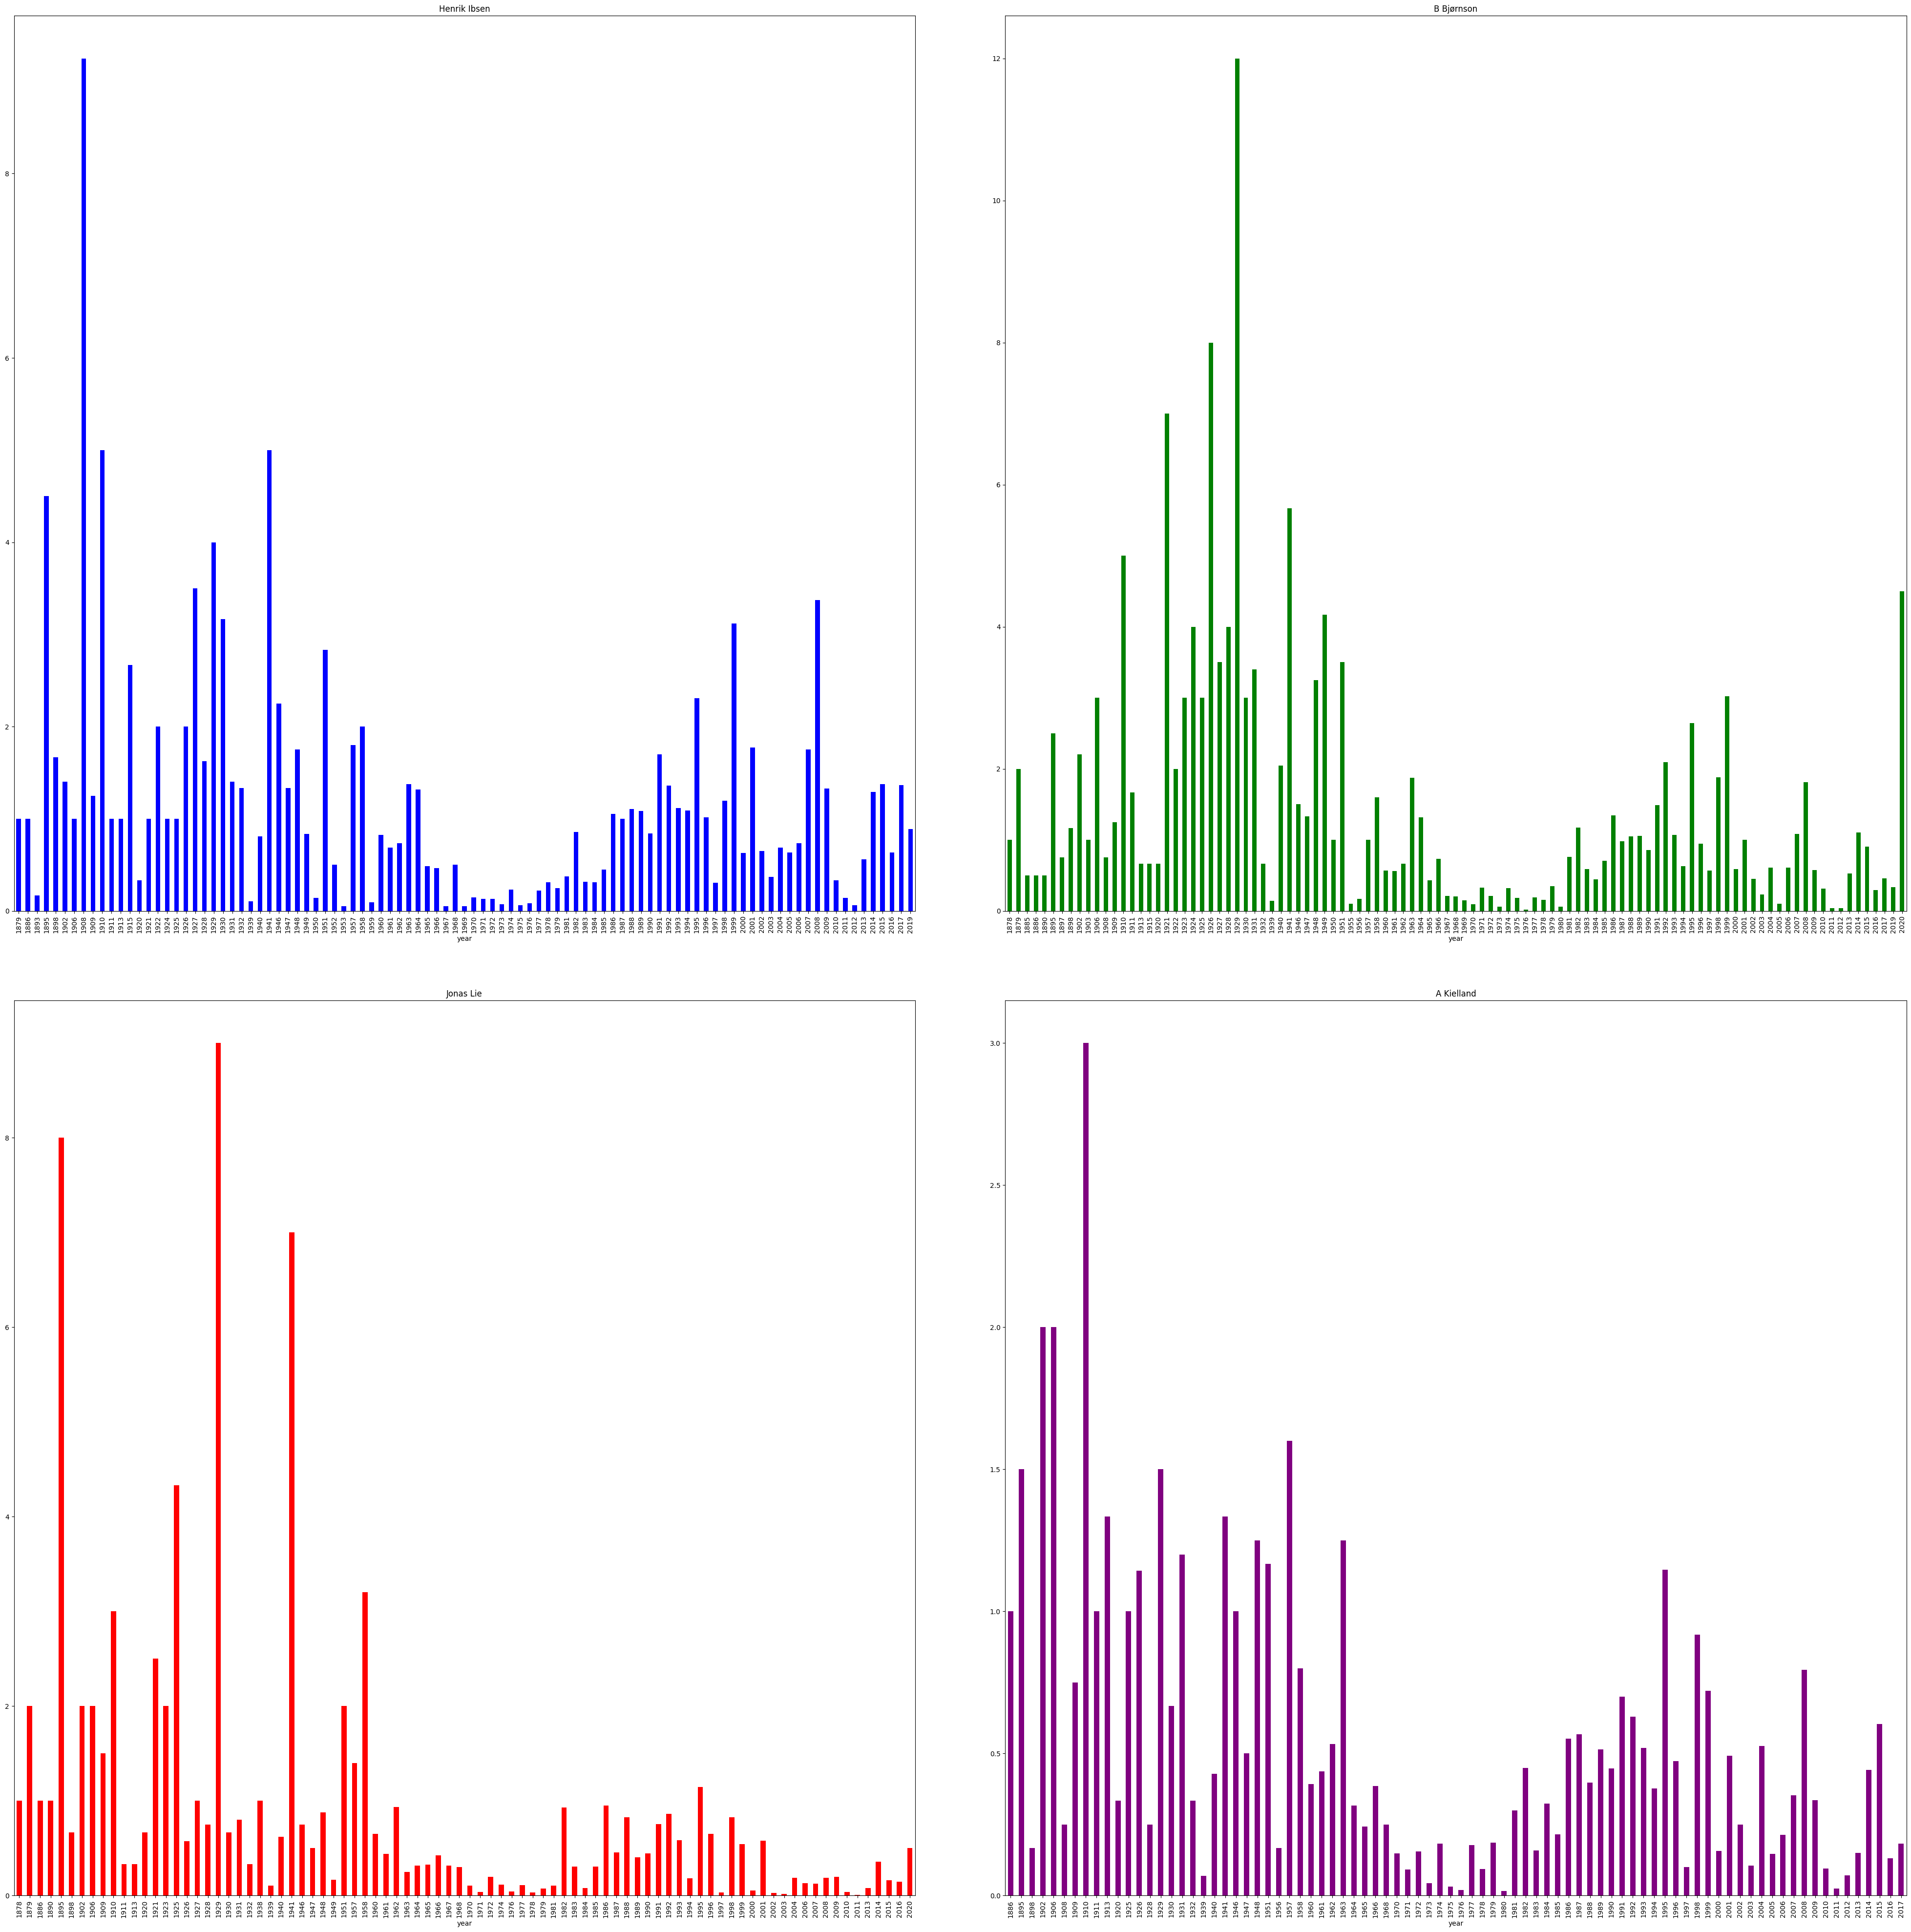

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(50, 50))

# Plot each series on a different subplot
relative_mentions_by_year(conc_dct[authors[0]], norsk).plot(kind="bar", ax=axes[0, 0], title="Henrik Ibsen", color="blue")
relative_mentions_by_year(conc_dct[authors[1]], norsk).plot(kind="bar", ax=axes[0, 1], title="B Bjørnson", color="green")
relative_mentions_by_year(conc_dct[authors[2]], norsk).plot(kind="bar", ax=axes[1, 0], title="Jonas Lie", color="red")
relative_mentions_by_year(conc_dct[authors[3]], norsk).plot(kind="bar", ax=axes[1, 1], title="A Kielland", color="purple")

# Add some spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

In [9]:
def plot_rolling_means(series_dict, window_size=5):
    # Calculate the number of rows and columns for the subplot grid
    num_series = len(series_dict)
    num_cols = 2
    num_rows = num_series // num_cols + (num_series % num_cols > 0)

    # Create a subplot grid
    # fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, num_rows * 5))
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
    axes = axes.flatten()

    # Set the font size for titles and axis labels
    title_fontsize = 16
    label_fontsize = 12

    # Iterate over the dictionary and plot the rolling means
    for i, (key, series) in enumerate(series_dict.items()):
        rolling_mean = series.rolling(window=window_size).mean()
        rolling_mean.plot(kind="line", ax=axes[i], title=key, color=plt.cm.tab10(i), linewidth=4)
        
        axes[i].set_title(key, fontsize=title_fontsize)
        axes[i].set_xlabel("År", fontsize=label_fontsize)
        axes[i].set_ylabel("Rolling Mean", fontsize=label_fontsize)

    # Remove any unused subplots
    for i in range(num_series, num_rows * num_cols):
        fig.delaxes(axes[i])

    # Add some spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Show the plot
    plt.show()

In [10]:
count_dct = dict()

for author in authors:
    count_dct[author] = relative_mentions_by_year(conc_dct[author], norsk)

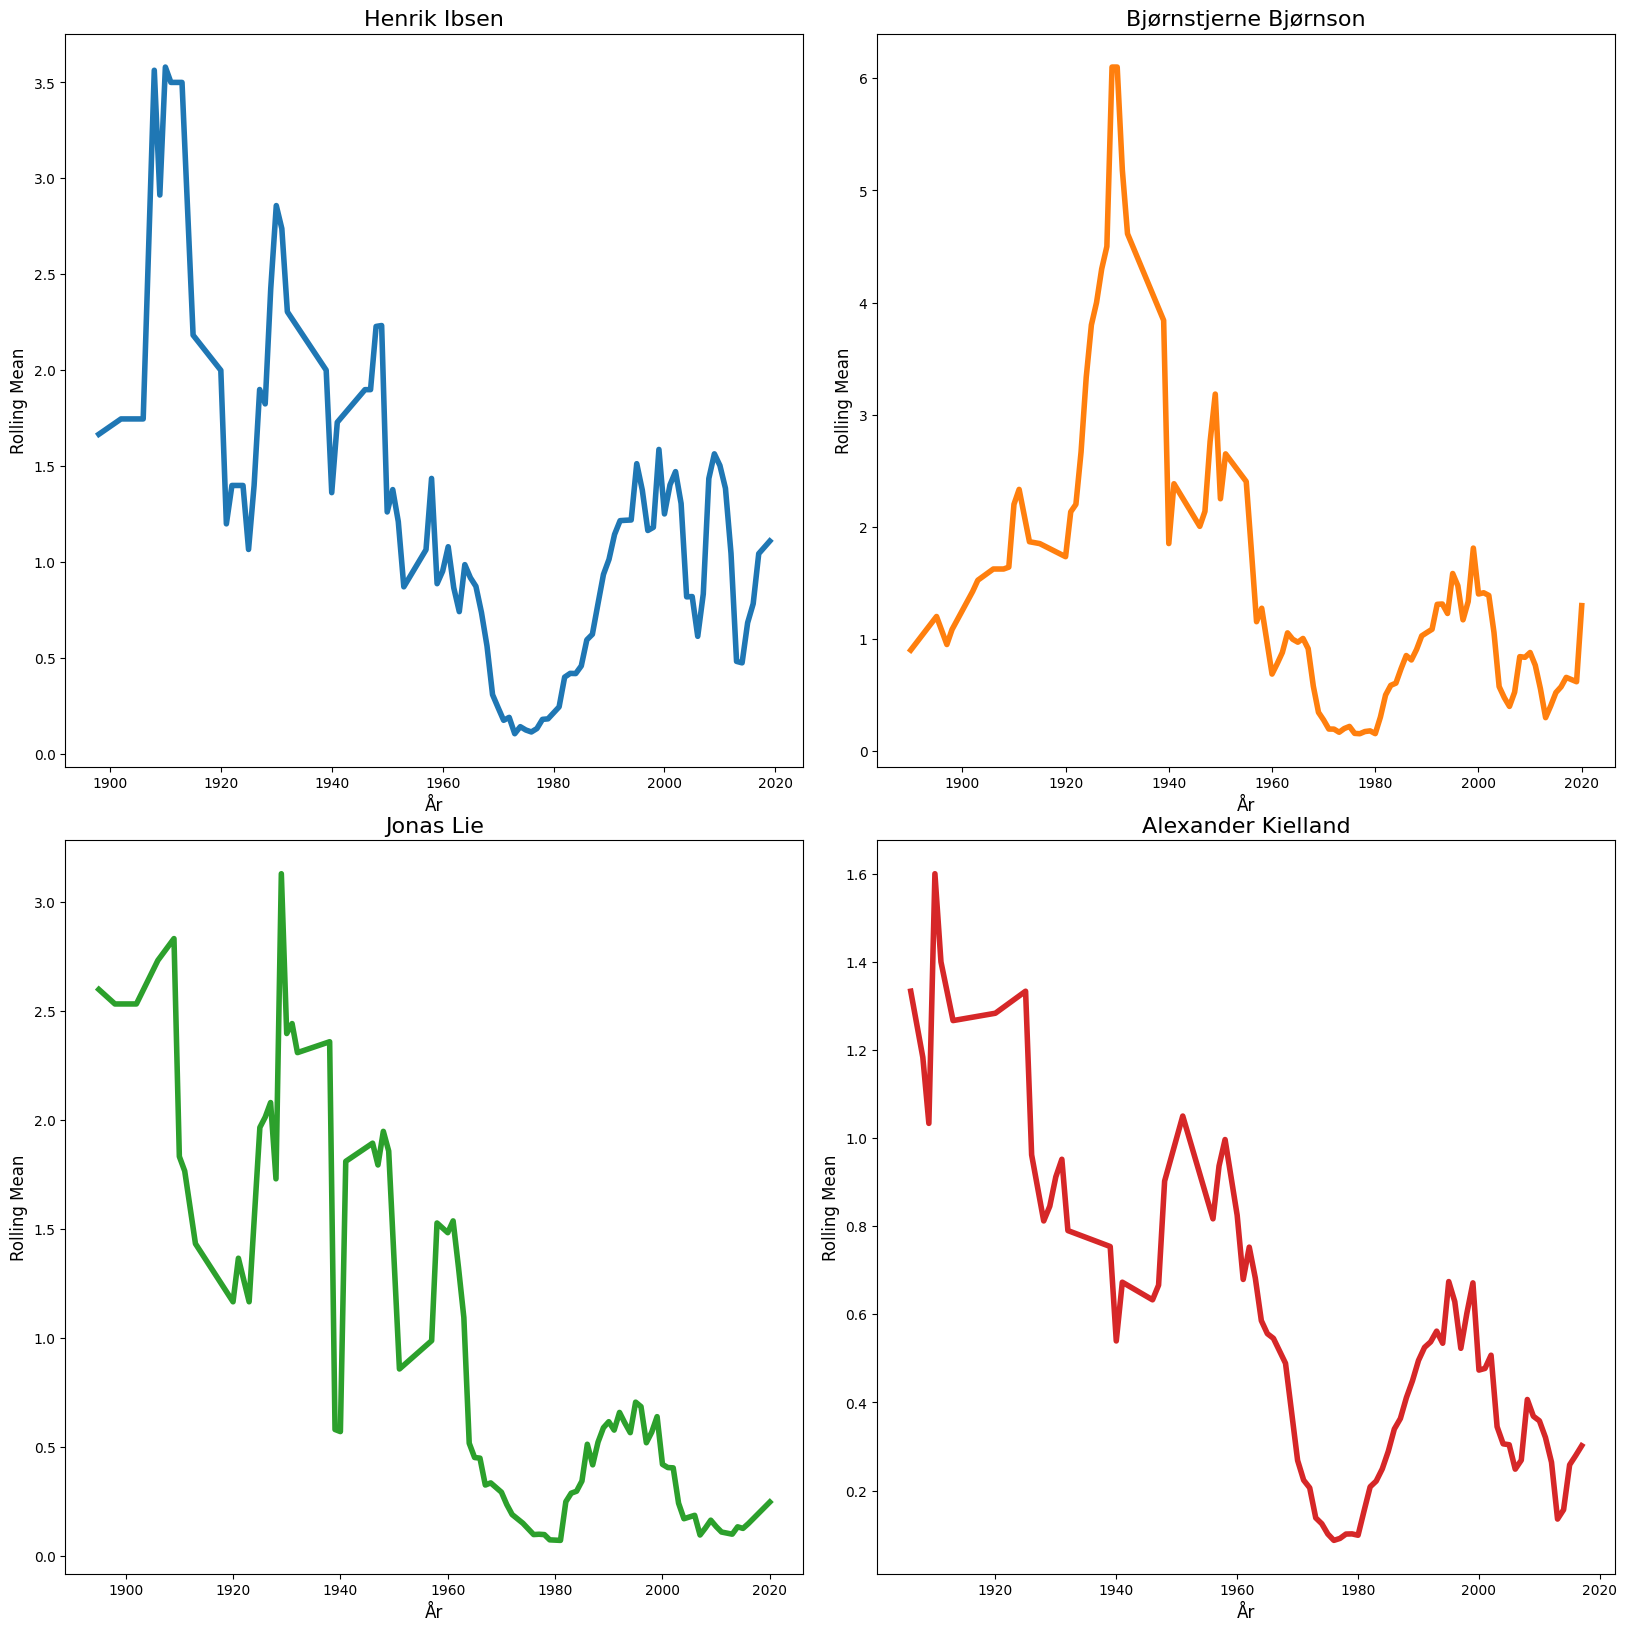

In [11]:
plot_rolling_means(count_dct, window_size=5)

## Andre forfattere

In [12]:
def plot_author(author, corpus):
    author_mentions = create_concordance(corpus, author)
    return relative_mentions_by_year(author_mentions, corpus)



<Axes: xlabel='year'>

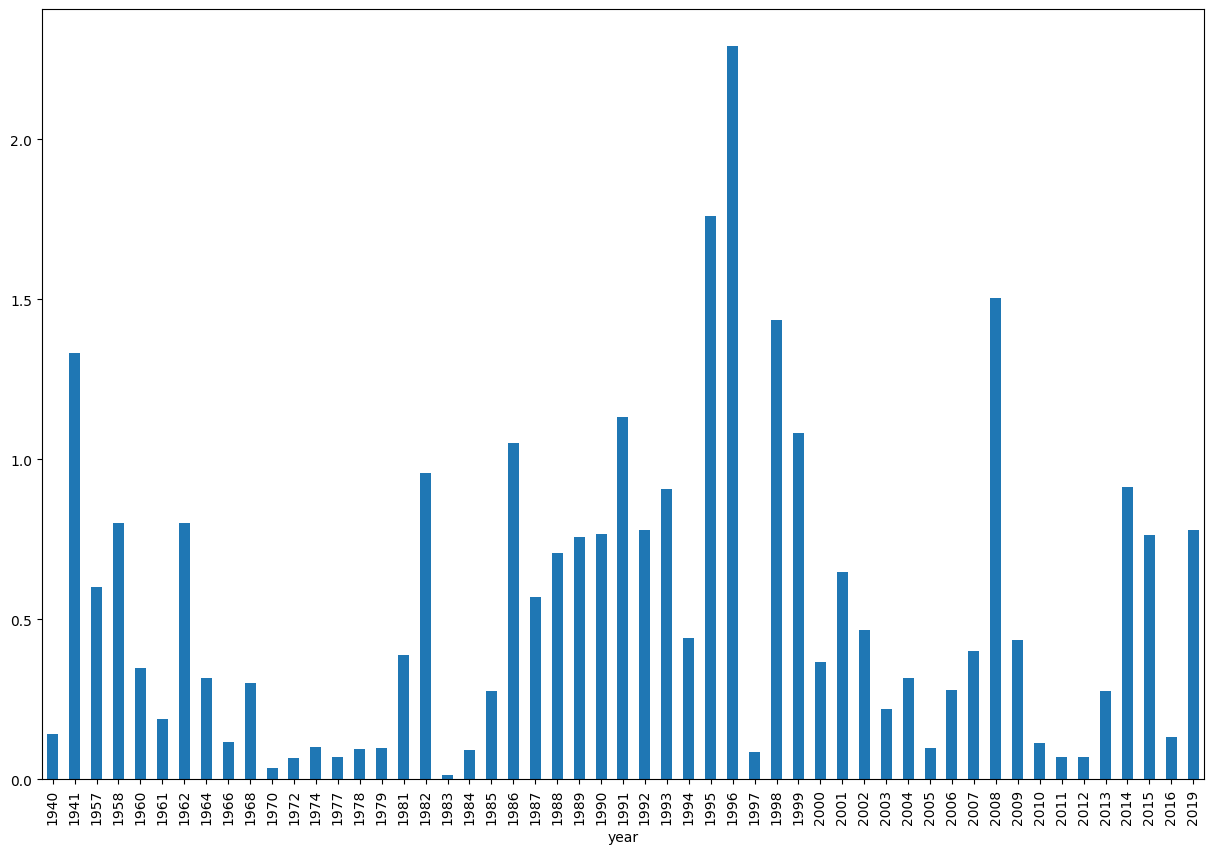

In [13]:
plot_author('Amalie Skram', norsk).plot(kind='bar')

<Axes: xlabel='year'>

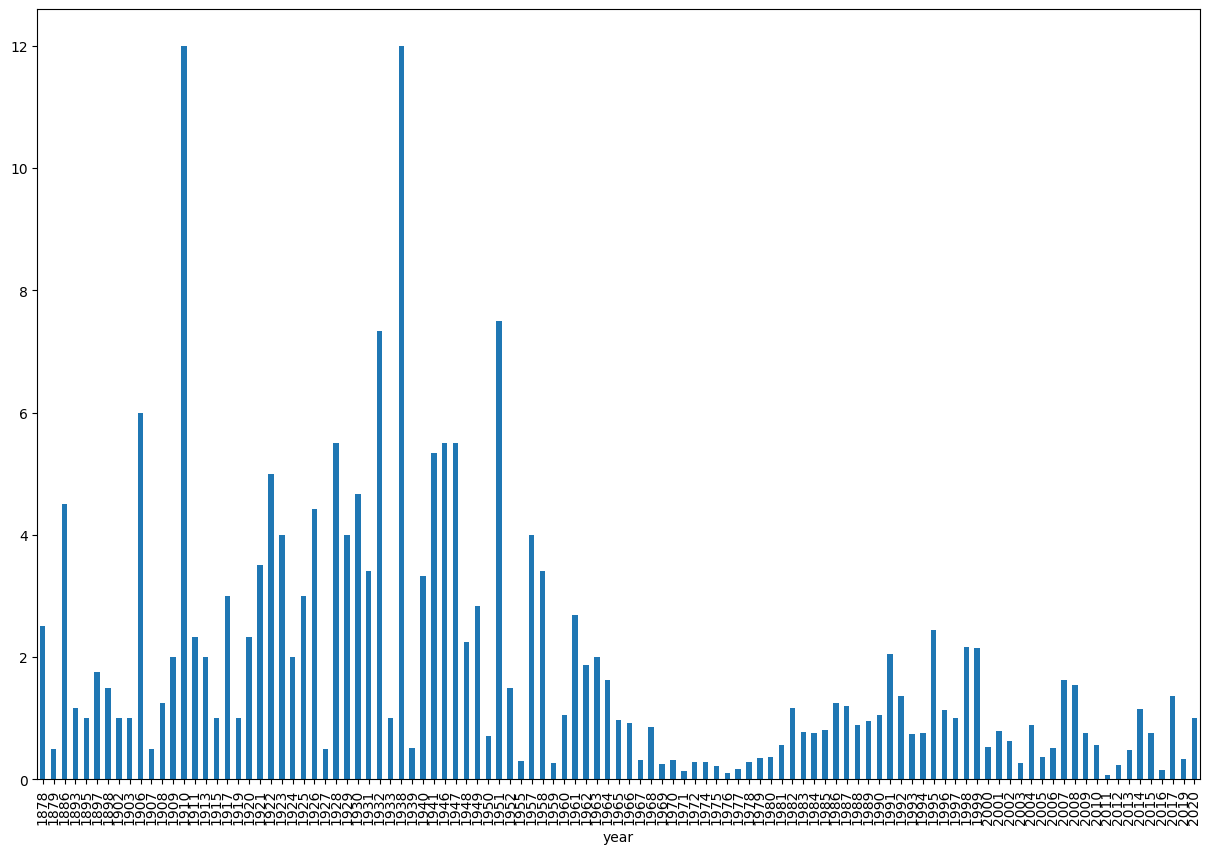

In [14]:
plot_author('Henrik Wergeland', norsk).plot(kind='bar')

<Axes: xlabel='year'>

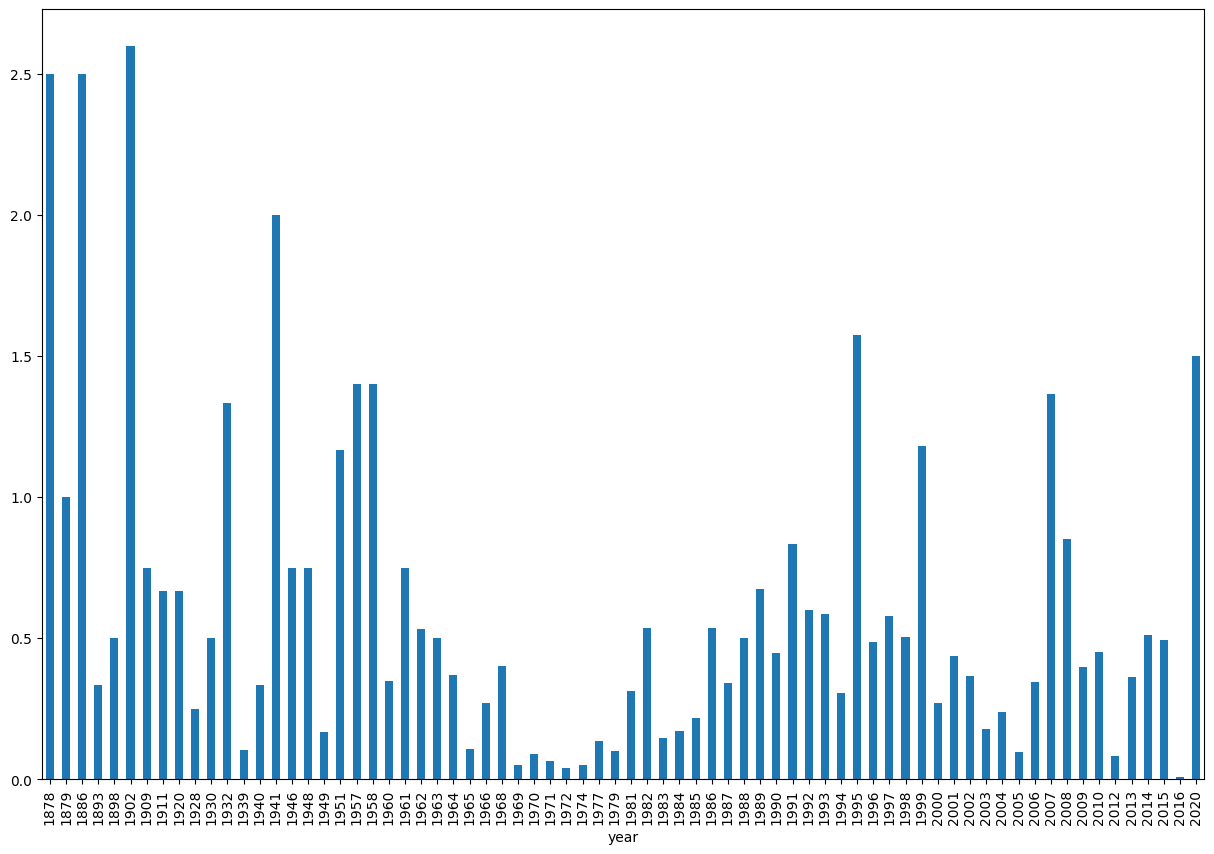

In [15]:
plot_author('Ludvig Holberg', norsk).plot(kind='bar')

<Axes: xlabel='year'>

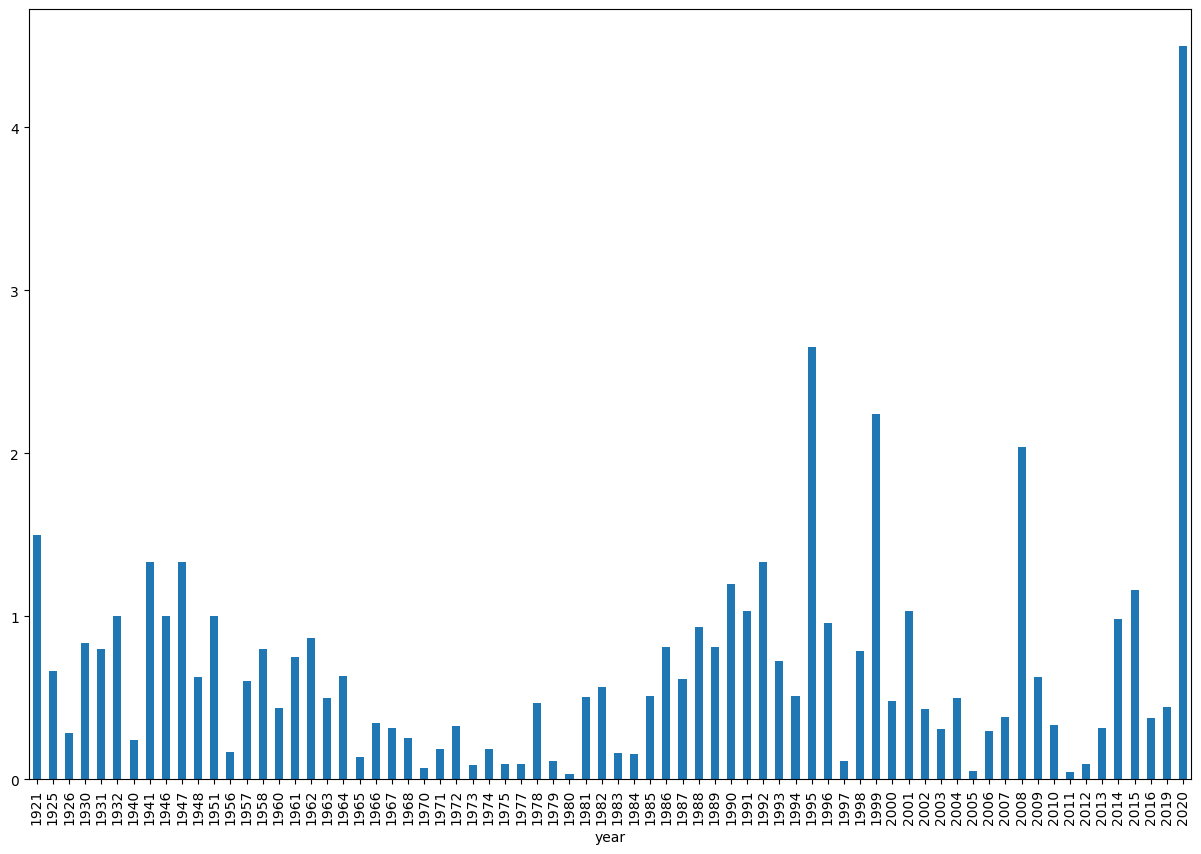

In [16]:
plot_author('Knut Hamsun', norsk).plot(kind='bar')